# Classification of Faces

Klassifikation von Bildern von "Miranda_Cosgrove", "Chris_Martin", "Emma_Stone", "Jamie_Foxx", "Steve_Jobs", "Zac_Efron", "Sandra_Oh" und "Taryn_Manning". 
DIe Datenstammen aus dem OXFORD VGG Face Dataset (http://www.robots.ox.ac.uk/~vgg/data/vgg_face/).

## Setup

### Einbinden von Paketen

In [102]:
import matplotlib.pyplot as plt
import numpy as np
import random
import tensorflow as tf
import h5py
import tensorflow.keras as keras

np.__version__, tf.__version__, tf.__version__, keras.__version__

('1.23.4', '2.11.0', '2.11.0', '2.11.0')

In [103]:
import urllib
import os

if not os.path.isfile('data/8_faces_train_and_valid.hdf5'):
    urllib.request.urlretrieve('https://www.dropbox.com/s/dx03vk6dmbtoywn/8_faces_train_and_valid.hdf5?dl=1', 'data/8_faces_train_and_valid.hdf5')
    
if not os.path.isfile('data/8_faces_test.hdf5'):
  urllib.request.urlretrieve('https://www.dropbox.com/s/ugxrdo0lpc2ixvr/8_faces_test.hdf5?dl=1', 'data/8_faces_test.hdf5')

In [104]:
h5f_X = h5py.File('data/8_faces_train_and_valid.hdf5', 'r')
print(list(h5f_X.keys()))
X_train = h5f_X['X_train_8_faces'][...]
print(X_train.shape)
Y_train = h5f_X['Y_train_8_faces'][...]
print(Y_train.shape)
X_valid = h5f_X['X_valid_8_faces'][...]
print(X_valid.shape)
Y_valid = h5f_X['Y_valid_8_faces'][...]
print(Y_valid.shape, X_valid.dtype)

h5f_X = h5py.File('data/8_faces_test.hdf5', 'r')
print(list(h5f_X.keys()))
X_test = h5f_X['X_test_8_faces'][...]
print(X_test.shape)
Y_test = h5f_X['Y_test_8_faces'][...]
print(Y_test.shape)

['X_train_8_faces', 'X_valid_8_faces', 'Y_train_8_faces', 'Y_valid_8_faces']
(2000, 48, 48, 3)
(2000,)
(400, 48, 48, 3)
(400,) float64
['X_test_8_faces', 'Y_test_8_faces']
(400, 48, 48, 3)
(400,)


In [105]:
np.min(X_train),np.max(X_train),np.min(X_test),np.max(X_test)
X_train /= 255
X_valid /= 255
X_test /= 255

In [106]:
Y_train=keras.utils.to_categorical(Y_train,8) # one-hot encoding
Y_valid=keras.utils.to_categorical(Y_valid,8)
Y_test=keras.utils.to_categorical(Y_test,8)

print(Y_train.shape)
print(Y_valid.shape)
print(Y_test.shape)

(2000, 8)
(400, 8)
(400, 8)


## 1. CNN "from scratch" trainieren

Trainiere ein Modell "from scratch". Benutze für alle `activations` in den versteckten Schichten `ReLU` und für den letzten Layer `softmax`. Benutze 3x3 Convolutions und  padding = same.

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten, Activation, Dropout
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras import optimizers

# create the model
model = keras.Sequential()
model.add(Convolution2D(filters=15, kernel_size=(3, 3), input_shape=(48, 48, 3), padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(filters=15, kernel_size=(3, 3), input_shape=(48, 48, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(filters=30, kernel_size=(3, 3), input_shape=(24, 24, 3), padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(filters=30, kernel_size=(3, 3), input_shape=(24, 24, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4,4)))

model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Activation('relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(8, activation='softmax'))

# compile the model and intitialize weights
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# summarize model along with number of model weights
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 48, 48, 15)        420       
                                                                 
 activation_25 (Activation)  (None, 48, 48, 15)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 48, 48, 15)        2040      
                                                                 
 activation_26 (Activation)  (None, 48, 48, 15)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 24, 24, 15)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 24, 24, 30)        4080      
                                                      

Modell trainieren:

In [108]:
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid)) 

Epoch 1/20
63/63 [==============================] - 8s 106ms/step - loss: 1.9741 - accuracy: 0.2270 - val_loss: 1.7155 - val_accuracy: 0.3925
Epoch 2/20
63/63 [==============================] - 6s 100ms/step - loss: 1.6155 - accuracy: 0.4140 - val_loss: 1.4977 - val_accuracy: 0.4475
Epoch 3/20
63/63 [==============================] - 6s 97ms/step - loss: 1.3769 - accuracy: 0.5015 - val_loss: 1.3575 - val_accuracy: 0.4700
Epoch 4/20
63/63 [==============================] - 6s 98ms/step - loss: 1.1574 - accuracy: 0.5860 - val_loss: 1.2804 - val_accuracy: 0.5275
Epoch 5/20
63/63 [==============================] - 6s 98ms/step - loss: 0.9912 - accuracy: 0.6500 - val_loss: 1.1239 - val_accuracy: 0.5925
Epoch 6/20
63/63 [==============================] - 6s 101ms/step - loss: 0.8305 - accuracy: 0.7110 - val_loss: 1.1241 - val_accuracy: 0.5950
Epoch 7/20
63/63 [==============================] - 6s 101ms/step - loss: 0.6848 - accuracy: 0.7545 - val_loss: 1.0675 - val_accuracy: 0.6325
Epoch 8/2

Aufzeichnen der Lernkurve:

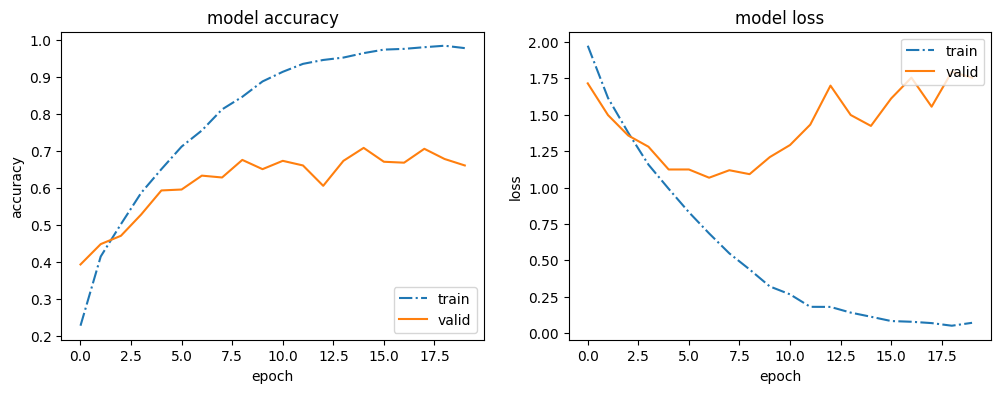

In [109]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,(1))
plt.plot(history.history['accuracy'],linestyle='-.')
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,(2))
plt.plot(history.history['loss'],linestyle='-.')
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')

Berechnung der Accuracy auf dem Testset:

In [110]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 0s 22ms/step - loss: 1.5725 - accuracy: 0.6875


[1.5724890232086182, 0.6875]

Berechnung der Konfusionsmatrix:

13/13 [==============================] - 0s 21ms/step


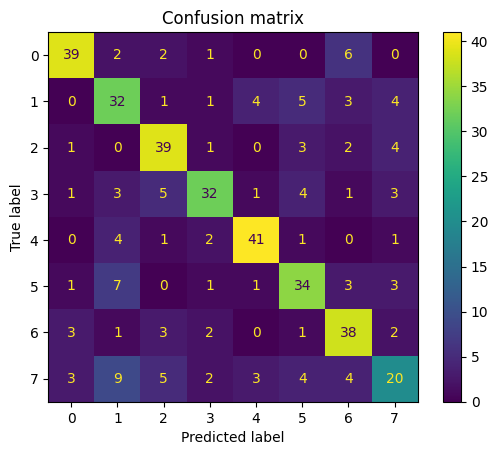

In [111]:
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer

Y_pred = model.predict(X_test)
c = metrics.confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(Y_pred, axis=1))
disp = metrics.ConfusionMatrixDisplay(c)
disp.plot()
plt.title('Confusion matrix')
plt.show()

Betrachtung eines falsch klassifizierten Bildes:

[ True  True  True False  True False  True False]
True class: [1]
Predicted class: [1]


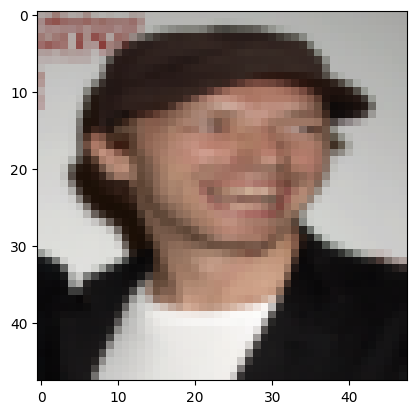

In [112]:
t = np.argmax(Y_test, axis=1) == np.argmax(Y_pred, axis=1)
print(t[0:8])

picture = 6

plt.imshow(X_test[picture])
indices = np.nonzero(Y_test[picture])[0]
print("True class: " + str(indices))
print("Predicted class: [" + str(np.argmax(Y_pred[picture])) + "]")

# 0 = Miranda Cosgrove
# 1 = Chris Martin (singer)
# 2 = Emma Stone (actress)
# 3 = Jamie Foxx (actor)
# 4 = Steve Jobs (entrepreneur)
# 5 = Zac Efron (actor)
# 6 = Sandra Oh (actress)
# 7 = Taryn Manning (actress)

## 2. Training mit Transfer Learning

In [113]:
from tensorflow.keras.applications import VGG16

img_height = img_width = 48
base_model = VGG16(weights='imagenet', include_top=False, input_shape = (img_width, img_height, 3))

In [114]:
fc1 = base_model.output
fc1 = Flatten()(fc1)

fc1 = Dense(512, activation='relu', name='my_dense1')(fc1)
fc1 = Dense(512, activation='relu', name='my_dense2')(fc1)
fc1 = Dense(100, activation='relu', name='my_dense3')(fc1)

fc1 = Dense(8, activation='softmax', name='my_dense4')(fc1)
model_trans = tf.compat.v1.keras.Model(base_model.input, fc1) # Current hack for TF 2.0 and keras
model_trans.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0   

In [115]:
for layer in model_trans.layers:
  name = layer.name
  if name.startswith('my'):
    layer.trainable = True
    print(name)
  else:
    layer.trainable = False

my_dense1
my_dense2
my_dense3
my_dense4


In [116]:
from tensorflow.keras.optimizers import SGD

model_trans.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

In [117]:
history = model_trans.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid)) 

Epoch 1/20
63/63 [==============================] - 36s 557ms/step - loss: 2.0082 - accuracy: 0.2270 - val_loss: 1.9281 - val_accuracy: 0.3000
Epoch 2/20
63/63 [==============================] - 34s 535ms/step - loss: 1.8596 - accuracy: 0.3305 - val_loss: 1.7917 - val_accuracy: 0.3675
Epoch 3/20
63/63 [==============================] - 32s 504ms/step - loss: 1.7463 - accuracy: 0.3885 - val_loss: 1.7390 - val_accuracy: 0.3550
Epoch 4/20
63/63 [==============================] - 33s 522ms/step - loss: 1.6577 - accuracy: 0.4180 - val_loss: 1.6309 - val_accuracy: 0.4225
Epoch 5/20
63/63 [==============================] - 34s 541ms/step - loss: 1.5774 - accuracy: 0.4460 - val_loss: 1.6146 - val_accuracy: 0.4025
Epoch 6/20
63/63 [==============================] - 32s 516ms/step - loss: 1.5101 - accuracy: 0.4625 - val_loss: 1.5839 - val_accuracy: 0.4425
Epoch 7/20
63/63 [==============================] - 33s 519ms/step - loss: 1.4592 - accuracy: 0.4775 - val_loss: 1.5339 - val_accuracy: 0.4675

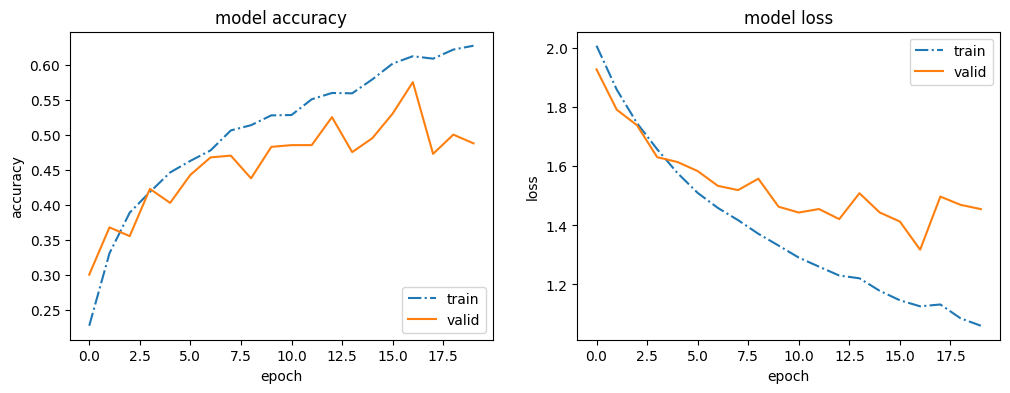

In [118]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,(1))
plt.plot(history.history['accuracy'],linestyle='-.')
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,(2))
plt.plot(history.history['loss'],linestyle='-.')
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')

Berechnung der Accuracy auf dem Testset:

In [119]:
from sklearn.metrics import confusion_matrix

model_trans.evaluate(X_test, Y_test)

13/13 [==============================] - 6s 462ms/step - loss: 1.4483 - accuracy: 0.4775


[1.4483124017715454, 0.47749999165534973]

13/13 [==============================] - 6s 440ms/step


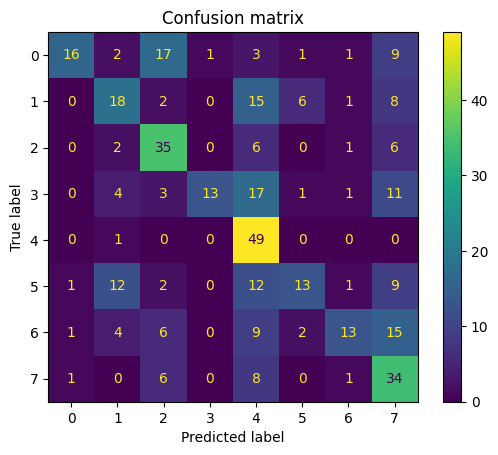

In [120]:
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer

Y_pred = model_trans.predict(X_test)
c = metrics.confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(Y_pred, axis=1))
disp = metrics.ConfusionMatrixDisplay(c)
disp.plot()
plt.title('Confusion matrix')
plt.show()

## 3. Versuche besser zu werden

Idee: Verwende Dropout und andere Tricks, um eine Überanpassung zu verhindern. Versuche auch, einige Convolutional Layer zu lernen.

In [122]:
fc2 = base_model.output
fc2 = Flatten()(fc2)

fc2 = Dense(512, activation='relu', name='my_dense1')(fc2)
fc2 = Dropout(0.2, name='my_dropout1')(fc2)

fc2 = Dense(512, activation='relu', name='my_dense2')(fc2)
fc2 = Dropout(0.2, name='my_dropout2')(fc2)

fc2 = Dense(100, activation='relu', name='my_dense3')(fc2)
fc2 = Dropout(0.2, name='my_dropout3')(fc2)

fc2 = Dense(8, activation='softmax', name='my_dense4')(fc2)
model_trans_2 = tf.compat.v1.keras.Model(base_model.input, fc2) # Current hack for TF 2.0 and keras
model_trans_2.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0   

In [123]:
from tensorflow.keras.optimizers import SGD

model_trans_2.compile(optimizer=SGD(), loss="categorical_crossentropy", metrics=['accuracy'])

Modell trainieren:

In [124]:
history = model_trans_2.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), epochs=20)

Epoch 1/20
63/63 [==============================] - 37s 566ms/step - loss: 2.1131 - accuracy: 0.1415 - val_loss: 2.0153 - val_accuracy: 0.2150
Epoch 2/20
63/63 [==============================] - 31s 501ms/step - loss: 2.0157 - accuracy: 0.2000 - val_loss: 1.9508 - val_accuracy: 0.2975
Epoch 3/20
63/63 [==============================] - 31s 499ms/step - loss: 1.9575 - accuracy: 0.2535 - val_loss: 1.8830 - val_accuracy: 0.3200
Epoch 4/20
63/63 [==============================] - 31s 500ms/step - loss: 1.9014 - accuracy: 0.2835 - val_loss: 1.7969 - val_accuracy: 0.3825
Epoch 5/20
63/63 [==============================] - 31s 500ms/step - loss: 1.8197 - accuracy: 0.3260 - val_loss: 1.7478 - val_accuracy: 0.3400
Epoch 6/20
63/63 [==============================] - 32s 505ms/step - loss: 1.7642 - accuracy: 0.3495 - val_loss: 1.7095 - val_accuracy: 0.3550
Epoch 7/20
63/63 [==============================] - 32s 502ms/step - loss: 1.7076 - accuracy: 0.3725 - val_loss: 1.6430 - val_accuracy: 0.4175

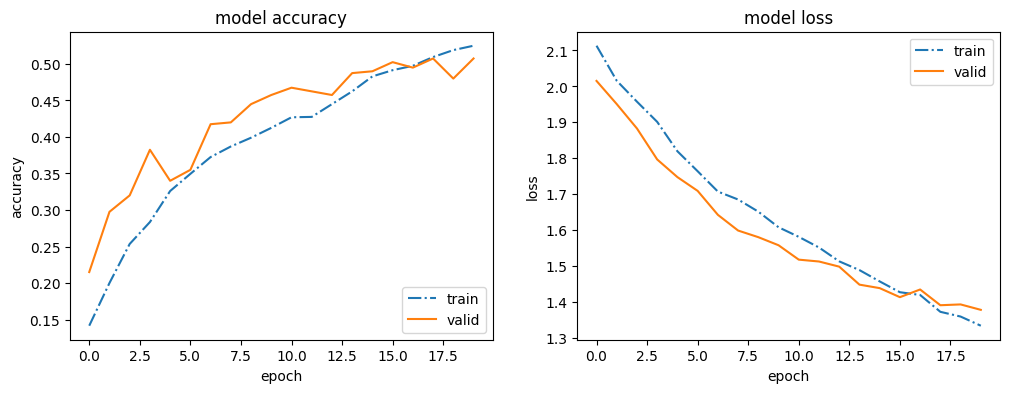

In [125]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,(1))
plt.plot(history.history['accuracy'],linestyle='-.')
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,(2))
plt.plot(history.history['loss'],linestyle='-.')
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')

Berechnung der Accuracy auf dem Testset:

In [126]:
model_trans_2.evaluate(X_test, Y_test)

13/13 [==============================] - 6s 427ms/step - loss: 1.2969 - accuracy: 0.5175


[1.2969251871109009, 0.5174999833106995]

Berechnung der Confusion Matrix:

13/13 [==============================] - 6s 425ms/step


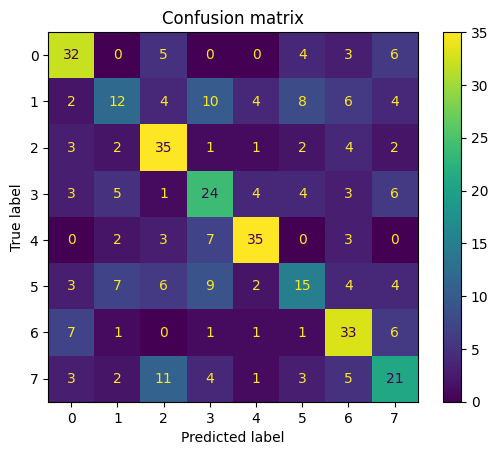

In [127]:
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer

Y_pred = model_trans_2.predict(X_test)
c = metrics.confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(Y_pred, axis=1))
disp = metrics.ConfusionMatrixDisplay(c)
disp.plot()
plt.title('Confusion matrix')
plt.show()